In [14]:
import pickle
from matplotlib import pyplot as plt

In [15]:
with open("data/glm2_results_3k.pkl", "rb") as f:
    results_glm2 = pickle.load(f)
with open("data/esm2_results_3k.pkl", "rb") as f:
    results_esm2 = pickle.load(f)
with open("data/mmseqs_results_3k.pkl", "rb") as f:
    results_mmseqs = pickle.load(f)


In [16]:
def count_context_matches(result, k, num_matches):
    num_correct = 0
    for x in result[:k]:
        if x >= num_matches:
            num_correct += 1
    return num_correct

(1.0, 10.0)

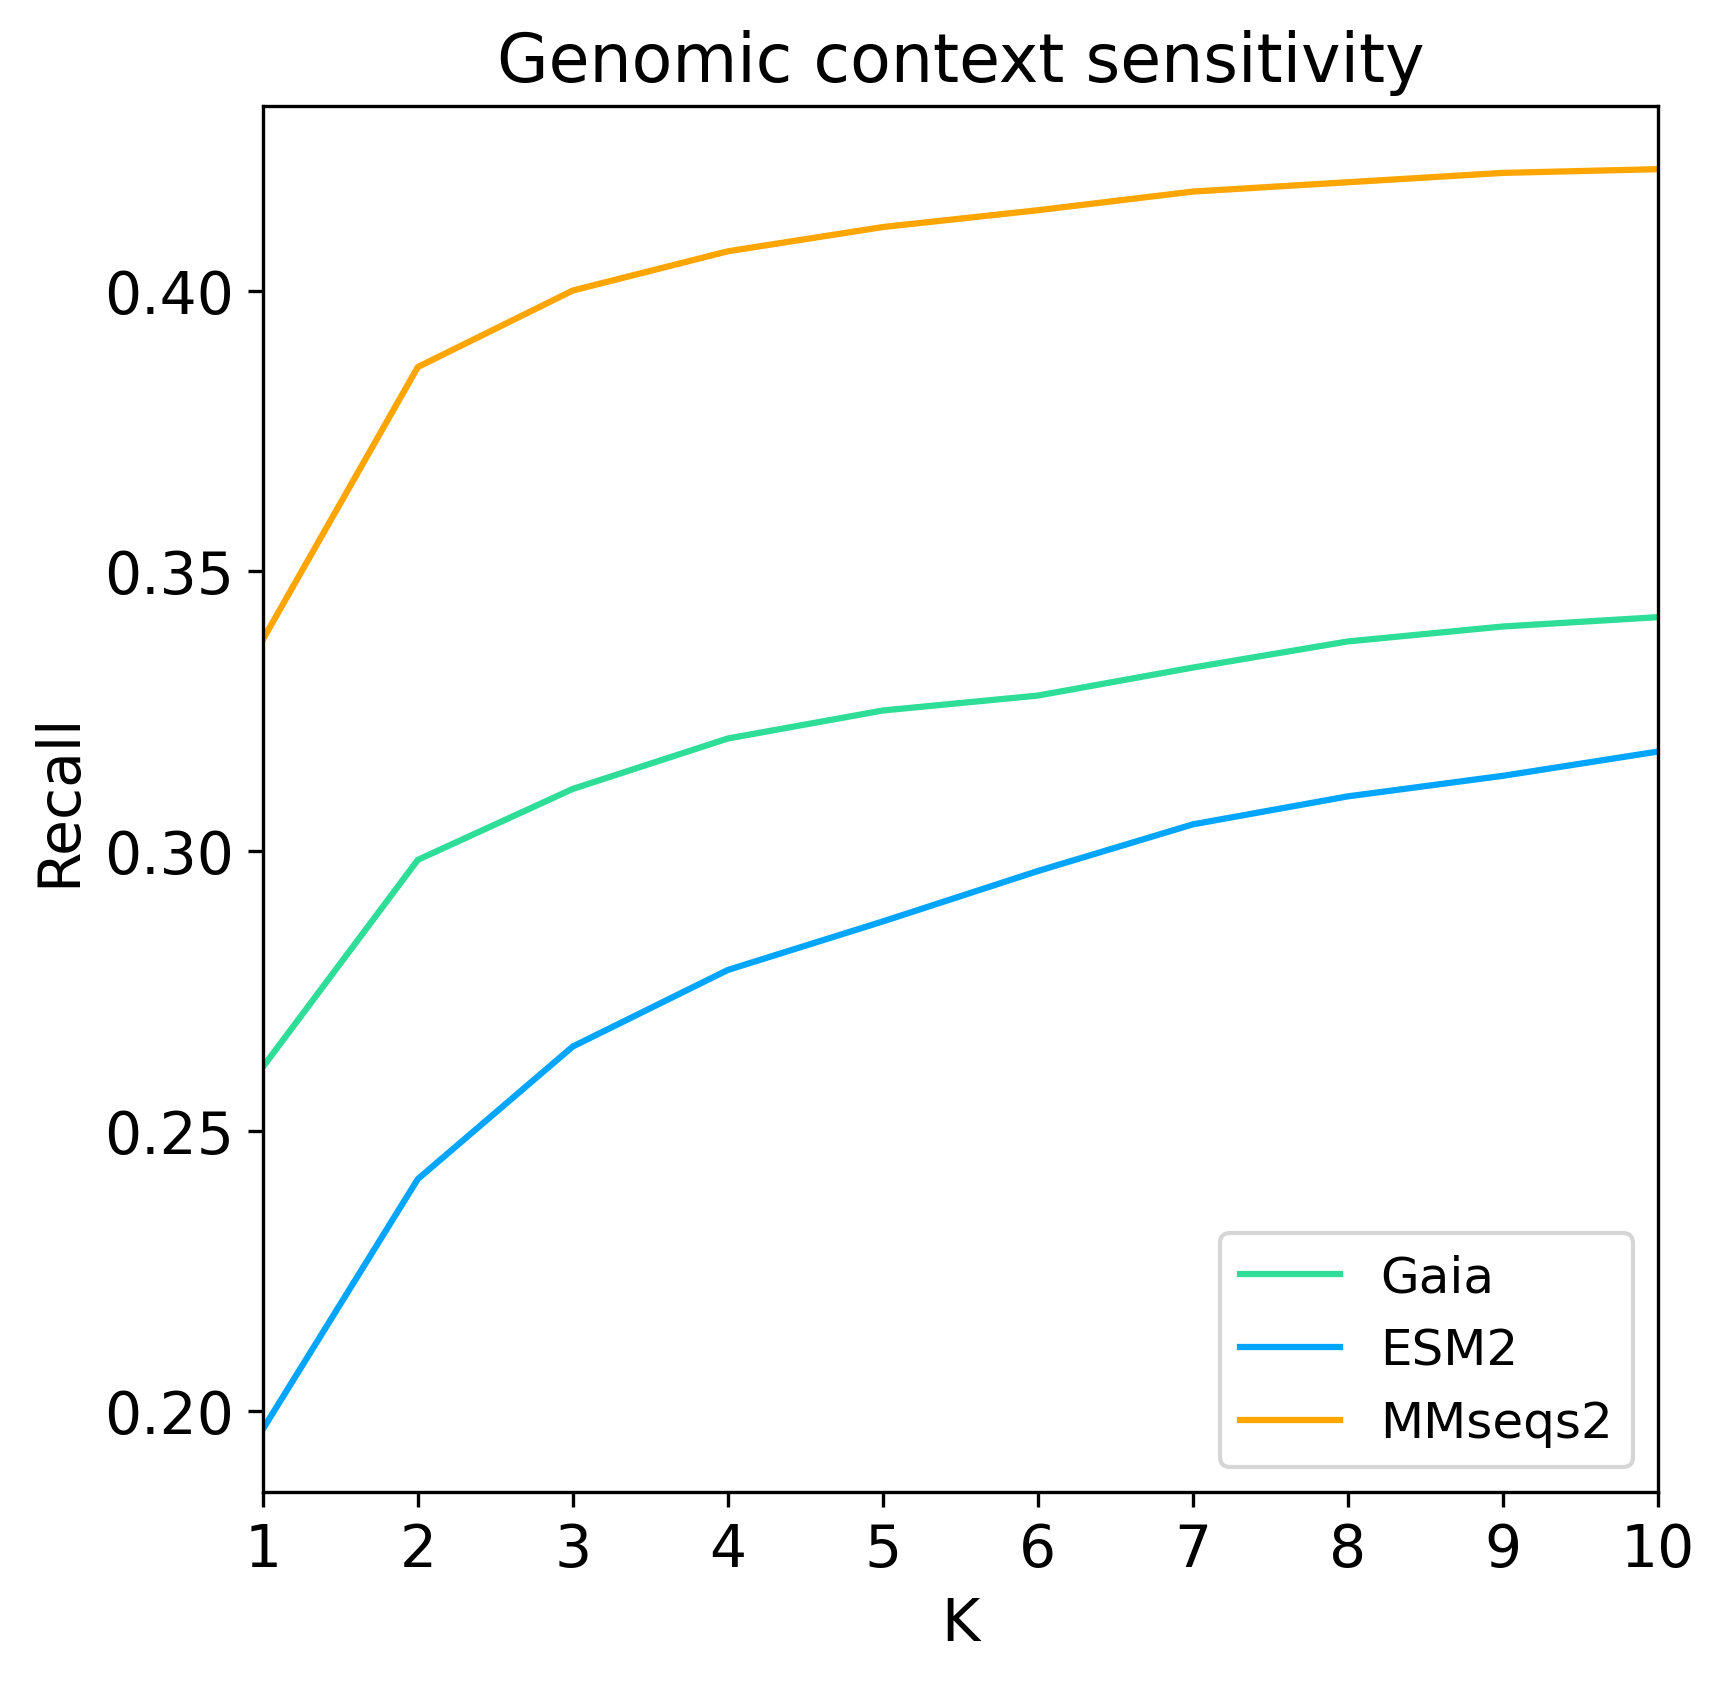

In [19]:
k_values = range(1,11)
plot_df = []
num_matches = 7

glm2_recalls = []
esm2_recalls = []
mmseqs_recalls = []
for k in k_values:
    recall_at_k_glm2 = sum([1 for result in results_glm2 if count_context_matches(result, k, num_matches)>=1])/len(results_glm2)
    recall_at_k_esm2 = sum([1 for result in results_esm2 if count_context_matches(result, k, num_matches)>=1])/len(results_esm2)
    recall_at_k_mmseqs = sum([1 for result in results_mmseqs if count_context_matches(result, k, num_matches)>=1])/len(results_mmseqs)
    glm2_recalls.append(recall_at_k_glm2)
    esm2_recalls.append(recall_at_k_esm2)
    mmseqs_recalls.append(recall_at_k_mmseqs)
plt.figure(figsize=(6, 6), dpi=300)
plt.plot(k_values, glm2_recalls, label='Gaia', color='#2edd97')
plt.plot(k_values, esm2_recalls, label='ESM2', color='#00A5FF')
plt.plot(k_values, mmseqs_recalls, label='MMseqs2', color='#FFA500')


plt.xlabel('K', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.title('Genomic context sensitivity', fontsize=16)
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(1, 10)

